In [ ]:
## Tutorial to use the "linares plot"

In [1]:
from linares_plot import *

In [ ]:
# By doing so, you also import the most standard python libraries

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.patches import Rectangle
# import scikits.bootstrap as bootstraps
# from seaborn_sinaplot import sinaplot ## install it at https://github.com/mparker2/seaborn_sinaplot
# import numpy as np


In [ ]:
# It also sets a poster style for the plots (big labels)
# If you want to modify it is simple: change it in your notebook after importing linares_plot

## Style of poster for the plots
#sns.set_context("poster", font_scale=1.1) ## poster format
#sns.set_style("ticks")


In [2]:
## Load a standard dataset to make some plots
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
### What is linares plot?

## It mixes a SINAPLOT with a BOX
## The sinaplot allows a nice visualization of the distribution of the data (individual dots, not cumulative or violin)
## The box shows the statistic (default is the mean) and the confidence intervals done by bootstrap

##### It offers the option to chose bootstrap with the whole data or in a subject basis

## It offers multiple visualization options:
##### BOX
##### BOX FILLED
##### LINE
##### DOT


## It uses a very standard "seaborn notation"
## It is great to compare different conditions (discrete better than continuous)
## It plots the statistical more relavant information together with the data distribution.


In [ ]:
## Default values

#### You need to specify:
####### x (independent variable)
####### y (dependent variable)
####### df (dataframe)
####### order (order of the different categories of the x) --> LINARES PLOT IS FOR CONDITION COMPARISON, NOT FOR CONTINUOS DISPLAY
####### hue (if there is)
####### palette (colors to use, no default)


# linares_plot(x, y, df, palette, order, hue=None, hue_order=None, point_size=1, alpha=0.4, CI=0.95,
#                   width=0.6, statistic=np.mean, by_subj=False, subj_col=None, plot_box=True, MS=12, LW=4, 
#                   reps=10000, leg=True, fill_box=False, alpha_box=1, sep_axis=True, L_size=16, loc_l='best')


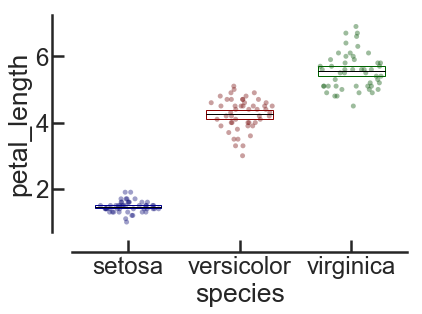

In [9]:
linares_plot(x='species', y='petal_length', df=iris, 
             palette=['darkblue', 'darkred', 'darkgreen'],  
             order=iris.species.unique(), 
             point_size=5)

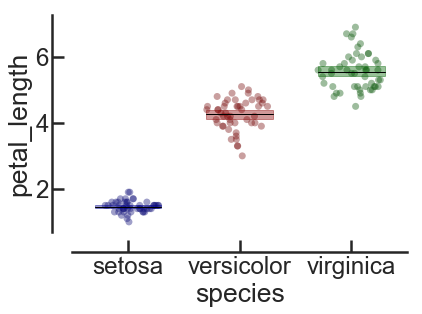

In [11]:
#### Change pointsize
#### FILL BOX

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['darkblue', 'darkred', 'darkgreen'],  
             order=iris.species.unique(), 
             point_size=7,
             fill_box=True, alpha_box=0.4)

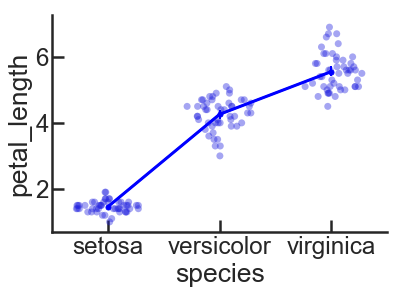

In [24]:
#### Change pointsize
#### LINE
#### Do not separate x axis

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['blue'],  
             order=iris.species.unique(), 
             point_size=7,
             plot_box='line',  MS=5, LW=2,
             sep_axis=False)

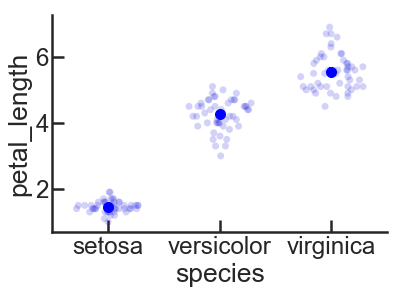

In [28]:
#### Change pointsize
#### POINT (mean)
#### Do not separate x axis
#### Change alpha points

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['blue'],  
             order=iris.species.unique(), 
             point_size=7,
             plot_box='mean',  MS=10,
             sep_axis=False,
             alpha=0.2)

In [41]:
### HUEs
### Add a column to have more than one category
height = [np.random.choice(['tall', 'short']) for i in range(len(iris)) ]
iris['height'] = height
iris.head()

sepal_length  sepal_width  petal_length  petal_width species height
0           5.1          3.5           1.4          0.2  setosa   tall
1           4.9          3.0           1.4          0.2  setosa  short
2           4.7          3.2           1.3          0.2  setosa   tall
3           4.6          3.1           1.5          0.2  setosa  short
4           5.0          3.6           1.4          0.2  setosa   tall

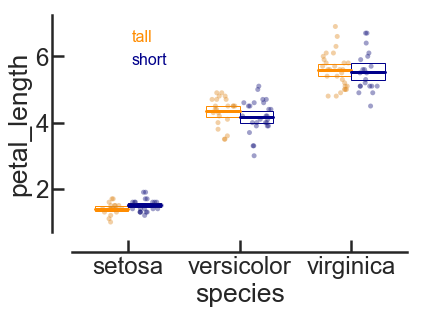

In [43]:
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             point_size=5)

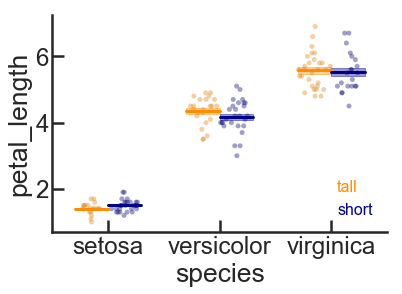

In [72]:
### fill box
### Change position of the legend
### reduce CI

linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             point_size=5,
             fill_box=True, alpha_box=0.4,
             sep_axis=False,
             loc_l=4,
             CI=0.68)

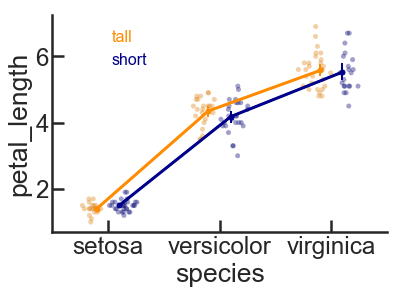

In [47]:
### line
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(),
             point_size=5,
             plot_box='line',  MS=5, LW=2,
             sep_axis=False)

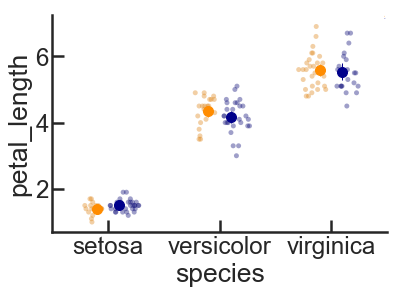

In [74]:
### mean (point)
### change error bar linewidth
### remove legend
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(),
             point_size=5,
             plot_box='mean',  MS=10, LW=1,
             sep_axis=False, 
             L_size=0)

In [54]:
#### Bootstrap options
#### keep the "subject structure" --> instead of mixing all trials, you mix the subjects and one one subject is picked, all the 
#### trials of this subjects enters in the bootstrap (corrects for different some subjects having more trials than others: in a 
#### random pick they will be under-represented)

#### imagine we have 5 flowers that change of species (absurd, I know...)
### Add a column to have more than one category
individu = [np.random.choice([1,2,3,4,5]) for i in range(len(iris)) ]
iris['individu'] = individu
iris.head()

sepal_length  sepal_width  petal_length  petal_width species height  \
0           5.1          3.5           1.4          0.2  setosa   tall   
1           4.9          3.0           1.4          0.2  setosa  short   
2           4.7          3.2           1.3          0.2  setosa   tall   
3           4.6          3.1           1.5          0.2  setosa  short   
4           5.0          3.6           1.4          0.2  setosa   tall   

   individu  
0         2  
1         5  
2         5  
3         3  
4         1

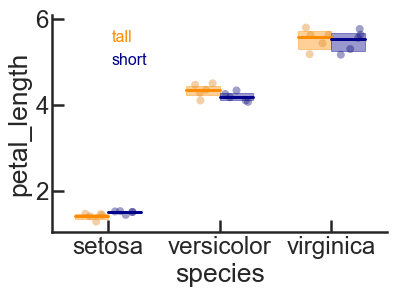

In [66]:
### bootstrap "by subject"
### Each point is the mean of each subject (changes a bit in the x dimension, in the y alwas the same)
### Change repetitios of bootstrap (the more the better, more time to compute)
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             by_subj=True, subj_col='individu', reps=100,
             point_size=8,
             fill_box=True, alpha_box=0.4,
             sep_axis=False)

In [ ]:
### File (backup)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 12:26:52 2019
@author: David BestuÃ©
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import scikits.bootstrap as bootstraps
from seaborn_sinaplot import sinaplot ## install it at https://github.com/mparker2/seaborn_sinaplot
import numpy as np


## Style of poster for the plots
sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_style("ticks")


### bootstrap by subject
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### if I want to compare two curves, I would use a sem to check the overlapping of the curves, so a=0.32 (ci = 1-0.68)
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])



def adjust_spines(ax, spines):  ### aesthetics, offset axies 
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 20))  # outward by 10 points
            ### spine.set_smart_bounds(True) ##comment if you want to be free to set the ylims by your own
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])




def linares_plot(x, y, df, palette, order, hue=None, hue_order=None, point_size=1, alpha=0.4, CI=0.95,
                  width=0.6, statistic=np.mean, by_subj=False, subj_col=None, plot_box=True, MS=12, LW=4, 
                  reps=10000, leg=True, fill_box=False, alpha_box=1, sep_axis=True, L_size=16, loc_l='best'):
    ####
    ####
    ####
    ####  This plots consists of a SINAPLOT (plot the trials/subjects) showing the distribution &
    ####  a BOX with the statistic (mean/median) and with the 95% c.i done by bootstrap
    ####
    ####
    #### SINAPLOT
    if by_subj==True:                                                                                                           # sinaplpot: one point per subject
        if hue==None:                                                                                                           # hue for the sinaplot
            df_by_subj=[]
            for x_val in order:
                for s_subject in df[subj_col].unique():
                    val_subj = df.loc[(df[subj_col]==s_subject) & (df[x]==x_val), y].mean()
                    df_by_subj.append([x_val, val_subj])
            #
            df_by_subj = pd.DataFrame(df_by_subj)
            df_by_subj.columns=[x, y]
            df_by_subj = df_by_subj[~np.isnan(df_by_subj.iloc[:,1])]
            sinaplot.sinaplot(x=x, y=y, hue=hue, data=df_by_subj, violin=False, point_size=point_size, palette=palette, 
                alpha=alpha, order=order, hue_order=hue_order, width=width)

        else:                                                                                                                   #no hue for the sinaplot                                                             
            df_by_subj=[]
            for x_val in order:
                for h_val in hue_order:
                    for s_subject in df[subj_col].unique():
                        val_subj = df.loc[(df[subj_col]==s_subject) & (df[x]==x_val) & (df[hue]==h_val), y].mean()
                        df_by_subj.append([x_val, h_val, val_subj])
            #
            df_by_subj = pd.DataFrame(df_by_subj)
            df_by_subj.columns=[x, hue, y]
            df_by_subj = df_by_subj[~np.isnan(df_by_subj.iloc[:,2])]
            sinaplot.sinaplot(x=x, y=y, hue=hue, data=df_by_subj, violin=False, point_size=point_size, palette=palette, 
                alpha=alpha, order=order, hue_order=hue_order, width=width)

    else:                                                                                                                       # sinaplot: one point per trial (default)
        sinaplot.sinaplot(x=x, y=y, hue=hue, data=df, violin=False, point_size=point_size, palette=palette,
                      alpha=alpha, order=order, hue_order=hue_order, width=width)

    ##### BOX
    cis=[]
    stas_m = []
    if hue==None:                                                                                                               # Box with median and c.i 95%
        for i_x, x_idx in enumerate(order):
            if by_subj==True:
                df_boot_bysubj = pd.DataFrame({y: df.groupby(x).get_group(x_idx)[y], subj_col: df.groupby(x).get_group(x_idx)[subj_col]})
                new_mean, inf_b, sup_b = boots_by_subj(df_boot_bysubj, y, subj_col, n_iterations=reps, alpha=1-CI, stat=np.mean)
                ci= np.array([inf_b, sup_b])
                cis.append(ci)
            #
            else:
                ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
                cis.append(ci)
            ##
            ####                
            m= statistic( df.loc[df[x]==x_idx, y] ) 
            stas_m.append(m)
            if plot_box==True:
                # vallue statistic
                left =  i_x - width/2   #i_x - width/len(order) 
                if fill_box==False: 
                    if len(palette)>1:
                        # position of rectangle
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=False, linewidth=1,  edgecolor=palette[i_x]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                    else:
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=False, linewidth=1,  edgecolor=palette[0]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                elif fill_box==True:
                    if len(palette)>1:
                        # position of rectangle
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=True, facecolor=palette[i_x], 
                        linewidth=1,  edgecolor=palette[i_x]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
                    else:
                        plt.gca().add_patch(Rectangle((left, ci[0]), width, ci[1]-ci[0],alpha=alpha_box, fill=True, facecolor=palette[0], 
                        linewidth=1, edgecolor=palette[0]))                 # plot the rectangle 
                        plt.plot([left, left+width], [m,m ], color='k', linewidth=1) 
    #        
    else:                                                                                                                       # hue
        for i_x, x_idx in enumerate(order):
            for i_h, h_idx in enumerate(hue_order):
                try:
                    if by_subj==True:
                        df_boot_bysubj = pd.DataFrame({y: df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], subj_col: df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[subj_col]})
                        new_mean, inf_b, sup_b = boots_by_subj(df_boot_bysubj, y, subj_col, n_iterations=reps, alpha=1-CI, stat=np.mean)
                        ci= np.array([inf_b, sup_b])
                        cis.append(ci)
                    else:
                        ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic,  alpha=1-CI, n_samples=reps)
                        cis.append(ci)
                    #
                    m= statistic( df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y] )
                    stas_m.append(m)
                    if plot_box==True:
                        if fill_box==False:
                            bar_length = width/len(hue_order) 
                            bott_left = i_x - width/2   + i_h*bar_length
                            plt.gca().add_patch(Rectangle((bott_left, ci[0]), bar_length , ci[1]-ci[0],
                                                          alpha=1, fill=False, linewidth=1, edgecolor=palette[i_h]))
                            plt.plot( [bott_left, bott_left+bar_length], [m,m ], palette[i_h], linewidth=3)
                        elif fill_box==True:
                            bar_length = width/len(hue_order) 
                            bott_left = i_x - width/2   + i_h*bar_length
                            plt.gca().add_patch(Rectangle((bott_left, ci[0]), bar_length , ci[1]-ci[0], 
                                                            alpha=alpha_box, fill=True, facecolor=palette[i_h], linewidth=1, edgecolor=palette[i_h]))
                            plt.plot( [bott_left, bott_left+bar_length], [m,m ], palette[i_h], linewidth=3)

                    
                except:
                    IndexError
    
    if plot_box=='line':
        if hue == None:
            means_=stas_m
            cis_ =cis
            x_s = np.array(range(len(order)))
            errors_abs = [abs(cis_[x]-means_[x]) for x in range(len(order))]
            neg_errors = [errors_abs[x][0] for x in range(len(order))]
            pos_errors = [errors_abs[x][1] for x in range(len(order))]
            plt.plot(x_s, means_, marker='o', markersize=MS, color=palette[0])
            plt.errorbar(x_s, means_, yerr=[neg_errors, pos_errors], color=palette[0], linewidth=LW)
            
        else:
            for i_h, h_idx in enumerate(hue_order): ##
                means_hue=stas_m[i_h::(len(hue_order))]
                cis_hue = cis[i_h::(len(hue_order))] 
                biases_pos = np.arange(-0.1, 1, 0.2)
                bias_x = biases_pos[i_h]               
                x_s = np.array(range(len(order))) + bias_x
                errors_abs = [abs(cis_hue[x]-means_hue[x]) for x in range(len(order))]
                neg_errors = [errors_abs[x][0] for x in range(len(order))]
                pos_errors = [errors_abs[x][1] for x in range(len(order))]
                plt.plot(x_s, means_hue, marker='o', markersize=MS, color=palette[i_h])
                plt.errorbar(x_s, means_hue, yerr=[neg_errors, pos_errors], color=palette[i_h], linewidth=LW)
                #
    ##
    if plot_box=='mean':
        if hue == None:
            means_=stas_m
            cis_ =cis
            x_s = np.array(range(len(order)))
            errors_abs = [abs(cis_[x]-means_[x]) for x in range(len(order))]
            neg_errors = [errors_abs[x][0] for x in range(len(order))]
            pos_errors = [errors_abs[x][1] for x in range(len(order))]
            if len(palette)>1:
                [plt.plot(x_s[n], means_[n], marker='o', markersize=MS, color=palette[n], linewidth=0) for n in range(len(means_))]
                [plt.errorbar(x_s[n], means_[n], yerr=[[neg_errors[n], pos_errors[n] ]], color=palette[n], 
                    linewidth=0, elinewidth=LW ) for n in range(len(means_))]
            else:
                [plt.plot(x_s[n], means_[n], marker='o', markersize=MS, color=palette[0], linewidth=0) for n in range(len(means_))]
                [plt.errorbar(x_s[n], means_[n], yerr=[[neg_errors[n], pos_errors[n] ]], color=palette[0], 
                    linewidth=0, elinewidth=LW ) for n in range(len(means_))]
            
        else:
            for i_h, h_idx in enumerate(hue_order):
                means_hue=stas_m[i_h::(len(hue_order))]
                cis_hue = cis[i_h::(len(hue_order))] 
                biases_pos = np.arange(-0.1, 1, 0.2)
                bias_x = biases_pos[i_h]               
                x_s = np.array(range(len(order))) + bias_x
                errors_abs = [abs(cis_hue[x]-means_hue[x]) for x in range(len(order))]
                neg_errors = [errors_abs[x][0] for x in range(len(order))]
                pos_errors = [errors_abs[x][1] for x in range(len(order))]
                plt.plot(x_s, means_hue, marker='o', markersize=MS, color=palette[i_h], linewidth=0)
                plt.errorbar(x_s, means_hue, yerr=[neg_errors, pos_errors], color=palette[i_h], 
                    linewidth=0, elinewidth=LW)
    #####
    plt.xticks(  np.arange(len(df[x].unique())) , order)                                                                       # Aesthetics of the plot
    plt.xlim(-0.5, len(df[x].unique())-0.5 )                                                                                    # xlim
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    ##
    if sep_axis==True: ##decide wether or not, separate the x and y
        adjust_spines(plt.gca(), ['left', 'bottom'])
    ##
    ##### Legend
    if leg==True:
        if hue!=None:
            l = plt.legend(loc=loc_l, frameon=False, prop={'size': L_size})
            for i_h, h_idx in enumerate(hue_order):
                l.get_texts()[i_h].set_text(h_idx)
                l.legendHandles[i_h].set_visible(False);
                l.get_texts()[i_h].set_color(palette[i_h]);
    if leg==False:
        l = plt.legend(loc=loc_l, frameon=False, prop={'size': 0})
    #l.get_texts()[0].set_text('delay=0')
    

